In [34]:
'''
    python ==> MalwareML, claMP 악성코드 샘플을 사용해 Decision Tree, SVM, PCA를 구현해 히스토그램을 그려보는 코드
'''
# load library and file
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ClaMP_Integrated-5184.csv')

In [35]:
# prepare data

# PCA 분석을 하기 위한 데이터를 따로 빼논다
y_label = df['class']
df_PCA = df.drop('class' ,1 )
df_PCA = df_PCA.drop('packer_type', 1)

# 데이터를 정상과 악성으로 나눈다.
benign = df.loc[df['class'] == 0]
malware = df.loc[df['class'] == 1]

# 위 데이터들을 80% 20%로 자른다
x_train_n, x_test_n = np.split(benign, [int(.8 * len(benign))])
x_train_m, x_test_m = np.split(malware, [int(.8 * len(malware))])

# 위에서 나누는 test, train 데이터들을 다시 합친다
x_train = np.concatenate([x_train_n, x_train_m])
x_test = np.concatenate([x_test_n, x_test_m])


In [43]:
# train, test 데이터의 마지막 정답데이터들을 따로 뺴낸다 
y_train = x_train[:, 69]
x_train = x_train[:, 0:69]
y_test = x_test[:,69]
x_test = x_test[:, 0:69]

# 아래 함수들에 넣을 때 에러가 나지 않기 위해 데이터를 아래와 같이 가공한다
y_train = np.array(y_train, dtype='int64')
y_test = np.array(y_test, dtype='int64')
# ''
x_train = x_train.reshape(4167, 1)
y_train = y_train.reshape(4167, 1)
x_test = x_test.reshape(1043, 1)

IndexError: index 69 is out of bounds for axis 1 with size 1

In [86]:
# Decision Tree 알고리즘
from sklearn import tree
# SVM 알고리즘
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def doDecisionTree(x_train, y_train, x_test):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    return y_pred 


def doSVM(x_train, y_train, x_test, c = 1.0 , g = 'auto'):
    if(g != 'auto'):
        clf = SVC(kernel='rbf', C = float(c), gamma = float(g))
    else:
        clf = SVC(kernel='rbf', C = float(c), gamma = 'auto')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    return y_pred

#def searchSVM(x, y, test):
#    tuned_parameters = [{'kerel'}]
    

In [87]:
# metrics
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def doAccuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

def doF1score(y_test, y_pred):
    return f1_score(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
def doConfusionMatrix(y_test, y_pred):
    cnf_maxrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cnf_maxrix, classes=['benign', 'malware'])
    return doAccuracy(y_test, y_pred)

In [88]:
# PCA 분석용 라이브러리 로드
from sklearn.decomposition import PCA

# PCA는 train, test를 나누지 않고 전체 데이터를 한 번 PCA를 돌려야 한다.
def doPCA(x_train, n ):
    pca = PCA(n_components = n)
    pca.fit(x_train)
    
    # n개의 컬럼의 PCA 결과값을 프린트한다
    print(pca.explained_variance_ratio_)
    
    # 주성분에 따라 추출된 n개의 컬럼을 반환한다
    x_train_transformed = pca.fit_transform(x_train)
    return x_train_transformed

In [89]:
# PCA 분석 수행. 5개의 대표컬럼만 추출한다
df_PCA = doPCA(df_PCA, 5)
df_PCA = np.column_stack((df_PCA, y_label))

print(df_PCA.shape)

[ 0.57609263  0.34590098  0.06679743  0.008549    0.00265995]
(5210, 6)


In [90]:
# PCA 데이터 나누기 ---------------------------------------------
# 데이터를 정상과 악성으로 나눈다.
benign_PCA = df_PCA[ y_label == 0]
malware_PCA = df_PCA[ y_label == 1]

# 위 데이터들을 80% 20%로 자른다
x_train_n_PCA, x_test_n_PCA = np.split(benign_PCA, [int(.8 * len(benign))])
x_train_m_PCA, x_test_m_PCA = np.split(malware_PCA, [int(.8 * len(malware))])

# 위에서 나누는 test, train 데이터들을 다시 합친다
x_train_PCA = np.concatenate([x_train_n_PCA, x_train_m_PCA])
x_test_PCA = np.concatenate([x_test_n_PCA, x_test_m_PCA])

# train, test 데이터의 마지막 정답데이터들을 따로 뺴낸다 
y_train_PCA = x_train_PCA[:, 5]
x_train_PCA = x_train_PCA[:, 0:5]
y_test_PCA = x_test_PCA[:,5]
x_test_PCA = x_test_PCA[:, 0:5]

# 아래 함수들에 넣을 때 에러가 나지 않기 위해 데이터를 아래와 같이 가공한다
y_train_PCA = np.array(y_train_PCA, dtype='int64')
y_test_PCA = np.array(y_test_PCA, dtype='int64')
# ''
x_train = x_train.reshape(4167, 1)
y_train = y_train.reshape(4167, 1)
x_test = x_test.reshape(1043, 1)

c:\programdata\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.682646212848 0.656759348035

0.703670546106 0.595022624434

-------------------------------------------------------

Confusion matrix, without normalization
[[319 179]
 [152 393]]
0.682646212848

Confusion matrix, without normalization
[[422  76]
 [282 263]]
0.656759348035


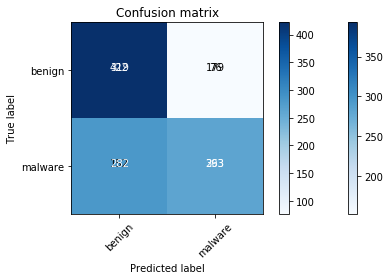

In [91]:
# Before PCA, simple SVM -----------------------------------------------
# Decision Tree와 SVN 분석 수행
y_pred = doDecisionTree(x_train, y_train, x_test)
y_pred2 = doSVM(x_train, y_train, x_test, 10, 0.0001)

print(doAccuracy(y_test, y_pred), doAccuracy(y_test, y_pred2))
print()
print(doF1score(y_test, y_pred), doF1score(y_test, y_pred2))
print("\n-------------------------------------------------------\n")
print(doConfusionMatrix(y_test, y_pred))
print()
print(doConfusionMatrix(y_test, y_pred2))

[*] Decision Tree acc:  0.905081495686  
[*] SVM acc:  0.627996164909

[*] Decision Tree f1:  0.909090909091  
[*] SVM f1 :  0.447293447293

-------------------------------------------------------

Confusion matrix, without normalization
[[449  49]
 [ 50 495]]

[*] Decision Tree acc:  0.905081495686

Confusion matrix, without normalization
[[498   0]
 [388 157]]

[*] SVM : acc 0.627996164909


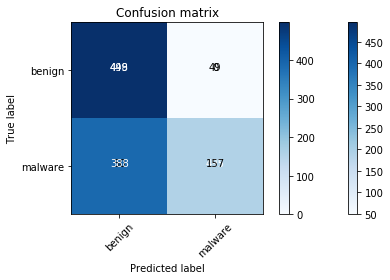

In [93]:
# After PCA, simple SVM -----------------------------------------------
# Decision Tree와 SVN 분석 수행
# SVM에서 커널함수 파라미터 C와 Gamma 값을 안 넣은 상태이므로 성능이 좋지 않다
y_pred_PCA = doDecisionTree(x_train_PCA, y_train_PCA, x_test_PCA)
y_pred2_PCA = doSVM(x_train_PCA, y_train_PCA, x_test_PCA)

print("[*] Decision Tree acc: ", doAccuracy(y_test_PCA, y_pred_PCA), " \n[*] SVM acc: ", doAccuracy(y_test_PCA, y_pred2_PCA))
print()
print("[*] Decision Tree f1: ",doF1score(y_test_PCA, y_pred_PCA)," \n[*] SVM f1 : ", doF1score(y_test_PCA, y_pred2_PCA))
print("\n-------------------------------------------------------\n")
print("\n[*] Decision Tree acc: ",doConfusionMatrix(y_test_PCA, y_pred_PCA))
print()
print("\n[*] SVM : acc",doConfusionMatrix(y_test_PCA, y_pred2_PCA))